Jakub Waszczakk - Laurenz Ruckensteiner - Leon van Rooijen (13991957)

A digital copy of this notebook can be found on https://deepnote.com/workspace/machine-learning-39f9-674e6fee-e0e8-4f85-a8dc-71b3d49523ae/project/Assignment-2-e4d366cd-5313-4926-8e8b-4b4e99c0ca5a/%2FAssignment_2_Part_2_Financial.ipynb

It is possible to run the notebook there without complication.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix as cm,precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
svc = SVC()
from sklearn.tree import DecisionTreeClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import confusion_matrix

# A1. Classification on Wine Dataset

Question 1.1. When we change the target variable to a multi-class classification setup we lose that there is order in the data. The class one (rating) is lower than two and so forth. An advantage would be that we can now also try out a wide range of classification models. It could be that one of those performs better than e.g. a regression model.

In [2]:
desc = {"volatile acidity":float, "fixed acidity":float, "citric acid":float,
        "residual sugar": float, "chlorides": float, "total sulfur dioxide": float,
        "free sulfur dioxide": float, "density": float, "pH": float,
        "sulphates": float, "alcohol": float, "quality": int}

red_wine = pd.read_csv("https://raw.githubusercontent.com/leonvanrooijen/opensource_data/main/winequality-red.csv", sep=';',dtype = desc)
white_wine = pd.read_csv("https://raw.githubusercontent.com/leonvanrooijen/opensource_data/main/winequality-white.csv", sep=';',dtype = desc)

Since we already preprocessed the data in Assignment 1, we will not elaborate any further on the features (except for the change in target variable which is now multi-class)

In [3]:
corr1 = red_wine.corr()
corr1.style.background_gradient(cmap="coolwarm").set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [4]:
def logistic_wine_regression(x: pd.DataFrame, y: pd.DataFrame, max_iter: int = 100,
random_state=0, test_size: float = 0.3):

    X_train,X_test,Y_train, Y_test = train_test_split(x,y,          
                                              random_state = 0,
                                              test_size = test_size)
    model_log = LogisticRegression(max_iter=max_iter)
    model_log.fit(X_train,Y_train)
    pred_train = model_log.predict(X_train)
    pred_test = model_log.predict(X_test)

    score = model_log.score(X_test, Y_test)

    train_accuracy = model_log.score(X_train, Y_train)
    test_accuracy = model_log.score(X_test, Y_test)

    print("=-= Evaluation =-=")

    print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')


    print(classification_report(Y_test, pred_test, zero_division=0))
    print("Micro average precision score: {:.3f}".format (precision_score(Y_test, pred_test, average="micro", zero_division=0)))

    
    return model_log



In [5]:
X_cols = ["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]


print("Red Wine Regression:")
red_w_r = logistic_wine_regression(x=red_wine[X_cols], y=red_wine['quality'], random_state=0, test_size=0.3, max_iter=5000)
print("\n \n")
print("White Wine Regression:")
white_w_r_ = logistic_wine_regression(x=white_wine[X_cols], y=white_wine['quality'], random_state=0, test_size=0.7, max_iter=3000)



Red Wine Regression:
=-= Evaluation =-=
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.59
Accuracy in Test  Group   : 0.62
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.77      0.72       208
           6       0.60      0.62      0.61       204
           7       0.42      0.31      0.36        45
           8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.59      0.62      0.60       480

Micro average precision score: 0.625

 

White Wine Regression:
=-= Evaluation =-=
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.54
Accuracy in Test  Group   : 0.52
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        

Logistic regression is actually a binary classification algorithm which can be used for questions such as Yes/No, True/False, etc. In this case it allows us to use it for multi-class classification problems such as ours because in our dataset there are 5 classes for quality to be predicted as. 

# A2. Bank Marketing Dataset

## Data Preprocessing 

First step: import & encode such that individual features have the right datatype. 

In [6]:
bank_marketing_test_label_unmerged = pd.read_csv("https://raw.githubusercontent.com/leonvanrooijen/opensource_data/main/test_label.csv")
bank_marketing_test_unmerged = pd.read_csv("https://raw.githubusercontent.com/leonvanrooijen/opensource_data/main/test.csv")
bank_marketing_test_label_unmerged.set_index("ID")
bank_marketing_test_unmerged.set_index("ID")

bank_marketing_test = bank_marketing_test_unmerged.merge(bank_marketing_test_label_unmerged).copy()
bank_marketing_train = pd.read_csv("https://raw.githubusercontent.com/leonvanrooijen/opensource_data/main/train.csv")
del bank_marketing_test_label_unmerged, bank_marketing_test_unmerged

In [7]:
#Encoding the data: this needs to be done for: job, marital, education, contact, poutcome
#enc = OneHotEncoder(handle_unknown='ignore')
#X = [['Male', 1], ['Female', 3], ['Female', 2]]
#enc.fit(X)
#OneHotEncoder(handle_unknown='ignore')

In [8]:
bank_marketing_train.head(10)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
5,15046,22,student,single,secondary,no,185,no,no,cellular,8,jul,1,-1,0,unknown,yes
6,15505,53,blue-collar,married,secondary,no,1777,yes,no,cellular,21,nov,5,154,1,failure,yes
7,22341,38,admin.,divorced,secondary,no,74,yes,no,cellular,23,jul,3,-1,0,unknown,no
8,18051,59,management,married,tertiary,no,3342,no,no,cellular,18,mar,2,188,6,other,yes
9,15826,37,housemaid,single,secondary,no,465,yes,no,cellular,18,may,3,-1,0,unknown,yes


In [9]:
#Encoding ['default', 'month', 'housing', 'loan', 'job', 'marital', 'education', 'contact', 'poutcome'] (categorical)
#Note that we assign a category for the unknowns (for now)
print(bank_marketing_test["poutcome"].unique())
enc_data = pd.get_dummies(data=bank_marketing_test, columns = ['default', 'month', 'housing', 'loan', 'job', 'marital', 'education', 'contact', 'poutcome'])
enc = OneHotEncoder(handle_unknown='ignore')
enc_data.head(10)


['success' 'unknown' 'failure' 'other']


,ID,age,balance,day,campaign,pdays,previous,y,default_no,default_yes,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,53608,32,12569,1,2,295,2,yes,1,0,...,0,1,0,1,0,0,0,0,1,0
1,51055,25,801,5,2,-1,0,yes,1,0,...,1,0,0,1,0,0,0,0,0,1
2,52573,46,1728,26,2,-1,0,no,1,0,...,1,0,0,0,0,1,0,0,0,1
3,50458,39,51,17,2,-1,0,no,1,0,...,1,0,0,0,0,1,0,0,0,1
4,52272,31,1626,31,1,-1,0,no,1,0,...,0,1,0,0,0,1,0,0,0,1
5,52072,34,806,19,3,458,1,yes,1,0,...,1,0,0,1,0,0,0,0,1,0
6,50973,24,805,5,2,-1,0,no,1,0,...,0,1,0,1,0,0,0,0,0,1
7,50553,37,3111,21,3,185,2,no,1,0,...,1,0,0,1,0,0,1,0,0,0
8,53135,34,425,16,7,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
9,53835,39,5574,14,2,-1,0,no,1,0,...,1,0,0,1,0,0,0,0,0,1


The data of the individual features looks fitted well according to the datatypes, we can proceed now.

## Data Exploration

We noticed there is a relative larger number of 'unknowns', especially in the outcome column. We decided not to fill these in because it regards so many values and it would significantly alter the dataset.

In [10]:
"""plt.figure(figsize=(75,75))
sns.pairplot(data=enc_data1, hue='education')
plt.show()"""

"plt.figure(figsize=(75,75))\nsns.pairplot(data=enc_data1, hue='education')\nplt.show()"

In [11]:
corr1 = bank_marketing_train.corr()
corr1.style.background_gradient(cmap="coolwarm").set_precision(2)

,ID,age,balance,day,campaign,pdays,previous
ID,1.00,-0.02,-0.01,0.01,0.01,0.01,0.00
age,-0.02,1.00,0.10,-0.01,0.00,-0.00,0.02
balance,-0.01,0.10,1.00,0.00,-0.02,0.02,0.04
day,0.01,-0.01,0.00,1.00,0.15,-0.08,-0.05
campaign,0.01,0.00,-0.02,0.15,1.00,-0.10,-0.05
pdays,0.01,-0.00,0.02,-0.08,-0.10,1.00,0.52
previous,0.00,0.02,0.04,-0.05,-0.05,0.52,1.00


In [12]:
enc_data1 = enc_data.loc[:,enc_data.columns != 'y']

minmax = MinMaxScaler()
print(minmax.fit(enc_data1))
print(minmax.transform(enc_data1))
enc_data2 = minmax.transform(enc_data1)
print(enc_data2)

MinMaxScaler()
[[0.84102564 0.18421053 0.25515302 ... 0.         1.         0.        ]
 [0.24592075 0.09210526 0.06609366 ... 0.         0.         1.        ]
 [0.5997669  0.36842105 0.08098642 ... 0.         0.         1.        ]
 ...
 [0.93776224 0.28947368 0.09457788 ... 0.         0.         1.        ]
 [0.87995338 0.27631579 0.09285886 ... 1.         0.         0.        ]
 [0.45337995 0.36842105 0.05401237 ... 0.         0.         1.        ]]
[[0.84102564 0.18421053 0.25515302 ... 0.         1.         0.        ]
 [0.24592075 0.09210526 0.06609366 ... 0.         0.         1.        ]
 [0.5997669  0.36842105 0.08098642 ... 0.         0.         1.        ]
 ...
 [0.93776224 0.28947368 0.09457788 ... 0.         0.         1.        ]
 [0.87995338 0.27631579 0.09285886 ... 1.         0.         0.        ]
 [0.45337995 0.36842105 0.05401237 ... 0.         0.         1.        ]]


In [13]:
"""plt.figure(figsize=(75,75))
sns.pairplot(data=enc_data1, hue='y')
plt.show()"""

"plt.figure(figsize=(75,75))\nsns.pairplot(data=enc_data1, hue='y')\nplt.show()"

## Classification Models

### LinearSVC

Scaled model

In [14]:
X_1= enc_data.loc[:,enc_data.columns != 'y']
Y_1 = enc_data['y']
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1, random_state = 42,test_size = 0.3)



pipeline = Pipeline([('scale', StandardScaler()),
                   ('clf',LinearSVC(random_state=42))])
param_grid ={'clf__C':[0.01,0.1,1.0,10,100]}

grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(X_train,Y_train)

pipeline.fit(X_train, Y_train)
y_pred = grid.predict(X_test)

In [15]:
y_pred2 = grid.predict(X_test)
print(classification_report(Y_test,y_pred2))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred2, average="micro")))
#print("Micro average recall score: {:.3f}".format (recall_score(Y_test, y_pred2, average="micro")))
#Its the same

              precision    recall  f1-score   support

          no       0.78      0.96      0.86       887
         yes       0.81      0.42      0.55       401

    accuracy                           0.79      1288
   macro avg       0.80      0.69      0.71      1288
weighted avg       0.79      0.79      0.76      1288

Micro average precision score: 0.788


Accuracy in scaled data is higher than in the one which is not. As well the F1 score has risen.

Relating to confusion matrix amount of FP increased but  TN significantly decreased, meaning that model at this point makes more "mistakes" .

The graph illustrates how correct predictions of the positive class (TPs) lead to increases in the TPR, while false positives (FPs) lead to an increase in the FPR.

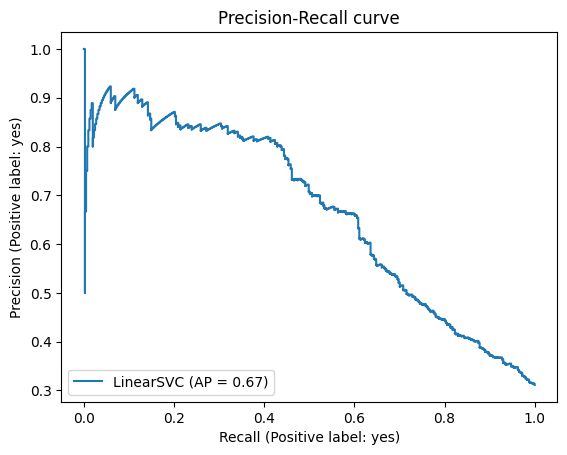

In [16]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
        grid, X_test, Y_test, name="LinearSVC"
)
_ = display.ax_.set_title("Precision-Recall curve")




Best: 0.766561 using {'clf__C': 1.0}
0.766227 (0.008952) with: {'clf__C': 0.01}
0.766227 (0.009780) with: {'clf__C': 0.1}
0.766561 (0.009928) with: {'clf__C': 1.0}
0.736263 (0.018514) with: {'clf__C': 10}
0.652692 (0.025927) with: {'clf__C': 100}
Score = 0.79
Training set score: 0.7742257742257742
Test set score: 0.7880434782608695


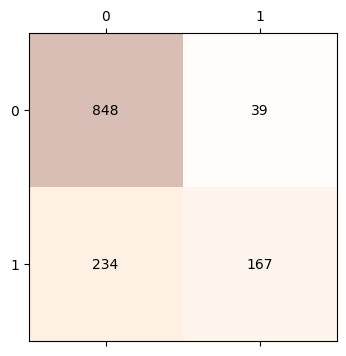

In [17]:
print("Best: %f using %s" % (grid.best_score_, 
    grid.best_params_))
means1 = grid.cv_results_['mean_test_score']
stds1 = grid.cv_results_['std_test_score']
params1 = grid.cv_results_['params']
for mean, stdev, param in zip(means1, stds1, params1):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(grid.score(X_test,Y_test)))
print('Training set score: ' + str(grid.score(X_train,Y_train)))
print('Test set score: ' + str(grid.score(X_test,Y_test)))
#0.1

conf_matrix = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

In comparison of StandardScaler with MinMaxScaler the results are almost the same what can be seen by plotting the confusion matrix.

Unscaled model

In [18]:
pipeline1 = Pipeline([('clf',LinearSVC(random_state=42))])
param_grid1 ={'clf__C':[0.01,0.1,1.0,10,100]}

grid2 = GridSearchCV(pipeline1, param_grid=param_grid1)
grid2.fit(X_train,Y_train)

pipeline1.fit(X_train, Y_train)
y_pred1 = grid2.predict(X_test)

Best: 0.539101 using {'clf__C': 0.01}
0.539101 (0.189323) with: {'clf__C': 0.01}
0.539101 (0.189323) with: {'clf__C': 0.1}
0.539101 (0.189323) with: {'clf__C': 1.0}
0.539101 (0.189323) with: {'clf__C': 10}
0.539101 (0.189323) with: {'clf__C': 100}
Score = 0.69
Training set score: 0.6933066933066933
Test set score: 0.687888198757764


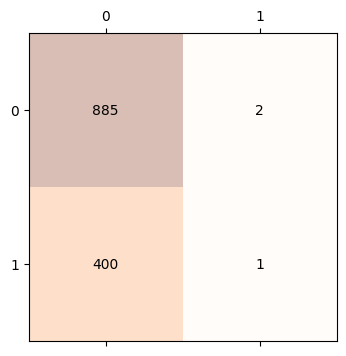

In [19]:
print("Best: %f using %s" % (grid2.best_score_, 
    grid2.best_params_))
means = grid2.cv_results_['mean_test_score']
stds = grid2.cv_results_['std_test_score']
params = grid2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(grid2.score(X_test,Y_test)))
print('Training set score: ' + str(grid2.score(X_train,Y_train)))
print('Test set score: ' + str(grid2.score(X_test,Y_test)))


conf_matrix = confusion_matrix(Y_test, y_pred1)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

In comparasion matrix done only on the raw LinearSVC model. Outcome at this point is really expectable but shown just to represent the small differences.

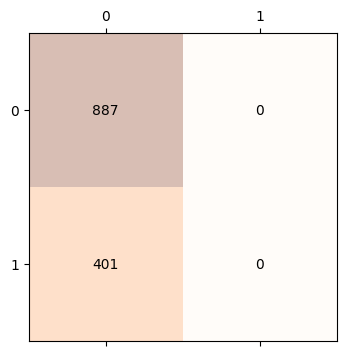

In [20]:
X_1= enc_data.loc[:,enc_data.columns != 'y']
Y_1 = enc_data['y']
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1, random_state = 42,test_size = 0.3)

SVC = LinearSVC()
svc.fit(X_train,Y_train)
y_p = svc.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_p)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

In [21]:
y_pred3 = grid2.predict(X_test)
print(classification_report(Y_test,y_pred3))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred3, average="micro")))

              precision    recall  f1-score   support

          no       0.69      1.00      0.81       887
         yes       0.33      0.00      0.00       401

    accuracy                           0.69      1288
   macro avg       0.51      0.50      0.41      1288
weighted avg       0.58      0.69      0.56      1288

Micro average precision score: 0.688


For large values of C, the optimization does a better job of getting all the training points classified correctly, thus improving accuracy. Conversely, small values of C will cause the optimizer to misclassify more points, thus decreasing the accuracy. 

Feature scaling has resulted in overall improvement of model performance. 

### LogisticRegression 

GridSearch  ->  inverse of regularization strength 

Scaled model

In [22]:
pipeline3 = Pipeline([('scale', StandardScaler()),
                   ('clf',LogisticRegression())])
param_grid ={'clf__C':[0.001,0.1,1.0,3.0]}

log_reg = GridSearchCV(pipeline3, cv=3, param_grid=param_grid)
log_reg.fit(X_train,Y_train)
y_pred4 = log_reg.predict(X_test)

In [23]:
print("Best: %f using %s" % (log_reg.best_score_, 
    log_reg.best_params_))
means = log_reg.cv_results_['mean_test_score']
stds = log_reg.cv_results_['std_test_score']
params = log_reg.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(log_reg.score(X_test,Y_test)))
print('Training set score: ' + str(log_reg.score(X_train,Y_train)))
print('Test set score: ' + str(log_reg.score(X_test,Y_test)))

print(classification_report(Y_test,y_pred4))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred4, average="micro")))
#0.1

Best: 0.769231 using {'clf__C': 0.1}
0.740593 (0.008490) with: {'clf__C': 0.001}
0.769231 (0.010604) with: {'clf__C': 0.1}
0.769231 (0.010220) with: {'clf__C': 1.0}
0.769231 (0.010220) with: {'clf__C': 3.0}
Score = 0.78
Training set score: 0.7768897768897769
Test set score: 0.7849378881987578
              precision    recall  f1-score   support

          no       0.79      0.95      0.86       887
         yes       0.78      0.43      0.55       401

    accuracy                           0.78      1288
   macro avg       0.78      0.69      0.71      1288
weighted avg       0.78      0.78      0.76      1288

Micro average precision score: 0.785


Unscaled model

In [24]:
pipeline4 = Pipeline([('clf',LogisticRegression())])
param_grid ={'clf__C':[0.001,0.1,1.0,3.0]}

log_reg = GridSearchCV(pipeline4, cv=3, param_grid=param_grid)
log_reg.fit(X_train,Y_train)
y_pred4 = log_reg.predict(X_test)

In [25]:
print("Best: %f using %s" % (log_reg.best_score_, 
    log_reg.best_params_))
means = log_reg.cv_results_['mean_test_score']
stds = log_reg.cv_results_['std_test_score']
params = log_reg.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(log_reg.score(X_test,Y_test)))
print('Training set score: ' + str(log_reg.score(X_train,Y_train)))
print('Test set score: ' + str(log_reg.score(X_test,Y_test)))

print(classification_report(Y_test,y_pred4))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred4, average="micro")))


Best: 0.691309 using {'clf__C': 0.001}
0.691309 (0.007250) with: {'clf__C': 0.001}
0.688978 (0.010488) with: {'clf__C': 0.1}
0.688978 (0.010488) with: {'clf__C': 1.0}
0.688978 (0.010488) with: {'clf__C': 3.0}
Score = 0.69
Training set score: 0.6933066933066933
Test set score: 0.6909937888198758
              precision    recall  f1-score   support

          no       0.70      0.98      0.81       887
         yes       0.53      0.06      0.11       401

    accuracy                           0.69      1288
   macro avg       0.62      0.52      0.46      1288
weighted avg       0.65      0.69      0.59      1288

Micro average precision score: 0.691


For small values of C, we increase the regularization strength which creates simple models which underfit the data. For big values of C, we decrease the power of regularization which implies the model is allowed to increase it's complexity, and therefore, overfit the data.

Feature scaling has resulted in an overall improvement in model performance. 

### KNN 

GridSearch -> optimize n_neighbors

Scaled model

In [26]:
n_splits = 5

pipeline = GridSearchCV(
    Pipeline([
            ('normalize', StandardScaler()),
            ('knn', KNeighborsClassifier())
    ]),
    {'knn__n_neighbors': list(range(1, 50)), 'knn__weights': ['uniform', 'distance']},
    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
)

print(end='Hyperparameter tuning for the KNN classifier ')
pipeline.fit(X_train, Y_train)

results = pipeline.cv_results_
best_comb = np.argmax(results['mean_test_score'])
best_params = results['params'][best_comb]

print('Best parameter combination:')
print('weights={}, n_neighbors={}'.format(best_params['knn__weights'],
                                          best_params['knn__n_neighbors']))

results

Hyperparameter tuning for the KNN classifier Best parameter combination:
weights=uniform, n_neighbors=15


{'mean_fit_time': array([0.0233541 , 0.01045399, 0.01014986, 0.01172814, 0.01202536,
        0.00926604, 0.00957618, 0.00896878, 0.0096189 , 0.01225944,
        0.01024675, 0.00952406, 0.00982161, 0.01080832, 0.01240325,
        0.00993376, 0.01070242, 0.01001358, 0.0100389 , 0.01491766,
        0.0180614 , 0.01326056, 0.01104531, 0.01168399, 0.01138   ,
        0.00908866, 0.01104803, 0.00952334, 0.00951757, 0.00975752,
        0.00994358, 0.00854692, 0.00974035, 0.00933833, 0.00952535,
        0.01207304, 0.0097064 , 0.01004629, 0.01019115, 0.0096004 ,
        0.01204967, 0.00985165, 0.0088666 , 0.01037984, 0.00966997,
        0.01203232, 0.01192031, 0.00994773, 0.01063461, 0.00945406,
        0.01086979, 0.01097765, 0.01004853, 0.0105381 , 0.00994568,
        0.01055441, 0.01055923, 0.01001873, 0.01069732, 0.00982933,
        0.01097975, 0.01007047, 0.00913343, 0.01101947, 0.01180539,
        0.01453042, 0.012005  , 0.01182194, 0.00961814, 0.01099944,
        0.01170397, 0.00997601,

In [27]:
y_pred5 = pipeline.predict(X_test)
print(classification_report(Y_test,y_pred5))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred5, average="micro")))

              precision    recall  f1-score   support

          no       0.78      0.94      0.85       887
         yes       0.76      0.43      0.55       401

    accuracy                           0.78      1288
   macro avg       0.77      0.68      0.70      1288
weighted avg       0.78      0.78      0.76      1288

Micro average precision score: 0.780


Unscaled

In [40]:
n_splits = 5

pipeline = GridSearchCV(
    Pipeline([('knn', KNeighborsClassifier())]),
    {'knn__n_neighbors': list(range(1, 50)), 'knn__weights': ['uniform', 'distance']},
    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
)

print(end='Hyperparameter tuning for the KNN classifier ')
pipeline.fit(X_train, Y_train)

results = pipeline.cv_results_
best_comb = np.argmax(results['mean_test_score'])
best_params = results['params'][best_comb]

print('Best parameter combination:')
print('weights={}, n_neighbors={}'.format(best_params['knn__weights'],
                                          best_params['knn__n_neighbors']))

results

Hyperparameter tuning for the KNN classifier Best parameter combination:
weights=uniform, n_neighbors=38


{'mean_fit_time': array([0.00858545, 0.02479348, 0.01998048, 0.02137523, 0.00670691,
        0.01997762, 0.00716972, 0.00863552, 0.00831122, 0.00566378,
        0.00406685, 0.00549622, 0.00841808, 0.00843825, 0.00921421,
        0.03002462, 0.00580983, 0.00686932, 0.00549431, 0.03022132,
        0.0139246 , 0.02115693, 0.00660973, 0.00773787, 0.01514077,
        0.01806173, 0.00755715, 0.0183063 , 0.01234913, 0.00625825,
        0.00563812, 0.00583797, 0.00409222, 0.00524573, 0.00578585,
        0.00623751, 0.01456604, 0.00759845, 0.01289997, 0.00789976,
        0.00519509, 0.01816564, 0.00586658, 0.00581789, 0.00546775,
        0.00505338, 0.01568942, 0.00576811, 0.00789475, 0.00600791,
        0.00468793, 0.00441151, 0.00429177, 0.0075213 , 0.00627213,
        0.00719538, 0.00594525, 0.01711645, 0.00487299, 0.00764775,
        0.02860236, 0.00509019, 0.00456915, 0.0059711 , 0.00565352,
        0.00703292, 0.01710982, 0.0055038 , 0.00529952, 0.01750007,
        0.01600122, 0.01904864,

In [41]:
y_pred5 = pipeline.predict(X_test)
print(classification_report(Y_test,y_pred5))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred5, average="micro")))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       887
           1       0.42      0.02      0.05       401

    accuracy                           0.69      1288
   macro avg       0.55      0.50      0.43      1288
weighted avg       0.61      0.69      0.57      1288

Micro average precision score: 0.686


The scaled model yields best results with K=15, resulting in a test accuracy 78%. As the value of K is decreased the test accuracy is decreased because the model closely fits the training data. On the other hand having large values of K the model becomes too general and this doesn't improve the test accuracy.

Feature scaling has resulted in an overall improvement in model performance. 

# B1. Decision Trees & Random Forest

## DecisionTreeClassifier

For all of the values we attempted to predict, 68% of them were correct.                                                                                                                                           Changing the amount of predictions in range of 5-1000 is insignificantly changing the outcome(less than 1%).

In [28]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)

In [29]:
print(classification_report(Y_test, predictions,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predictions, average="micro")))

              precision    recall  f1-score   support

          no       0.78      0.76      0.77       887
         yes       0.49      0.52      0.51       401

    accuracy                           0.68      1288
   macro avg       0.63      0.64      0.64      1288
weighted avg       0.69      0.68      0.69      1288

Micro average precision score: 0.683


In the confusion matrix without tunning the model we can observe very simmilar amount of FP,FN and TN values.

After tunning amount of FP significantly decrease.

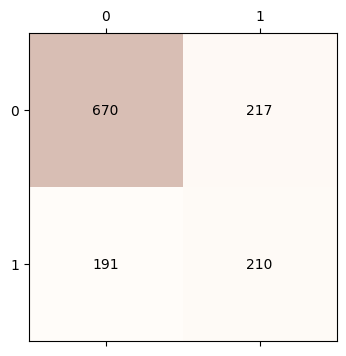

In [30]:
conf_matrix = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

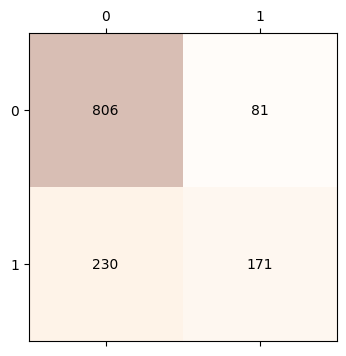

In [31]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'max_features': [1,5,10,15,20,25,30,35,40,45,50]}


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)

grid_dtree = GridSearchCV(dtree,param_grid = params,return_train_score=True)
grid_dtree.fit(X_train,Y_train)
predictions1 = grid_dtree.predict(X_test)
conf_matrix = confusion_matrix(Y_test, predictions1)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

In [32]:
print(classification_report(Y_test, predictions1,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predictions1, average="micro")))

              precision    recall  f1-score   support

          no       0.78      0.91      0.84       887
         yes       0.68      0.43      0.52       401

    accuracy                           0.76      1288
   macro avg       0.73      0.67      0.68      1288
weighted avg       0.75      0.76      0.74      1288

Micro average precision score: 0.759


In [33]:
print("Best: %f using %s" % (grid_dtree.best_score_, 
    grid_dtree.best_params_))
means = grid_dtree.cv_results_['mean_test_score']
stds = grid_dtree.cv_results_['std_test_score']
params = grid_dtree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(grid_dtree.score(X_test,Y_test)))
print('Training set score: ' + str(grid_dtree.score(X_train,Y_train)))
print('Test set score: ' + str(grid_dtree.score(X_test,Y_test)))


Best: 0.754582 using {'max_depth': 7, 'max_features': 30}
0.707626 (0.005629) with: {'max_depth': 1, 'max_features': 1}
0.693307 (0.000608) with: {'max_depth': 1, 'max_features': 5}
0.693307 (0.000608) with: {'max_depth': 1, 'max_features': 10}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 15}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 20}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 25}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 30}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 35}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 40}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 45}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 50}
0.705627 (0.005323) with: {'max_depth': 2, 'max_features': 1}
0.700300 (0.005020) with: {'max_depth': 2, 'max_features': 5}
0.693307 (0.000608) with: {'max_depth': 2, 'max_features': 10}
0.743590 (0.005024) with: {'max_depth': 2, 'max_features': 15}
0

In [34]:
"""from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
scores = pd.DataFrame(grid_dtree.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())"""

"from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit\nscores = pd.DataFrame(grid_dtree.cv_results_)\nscores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())\nscores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())"

### 2.1.C

Note that there is not a significant difference in test score when the maximum depth of the tree is increased. The optimum for the max depth is 7. When we look at the test score with a max depth of 3 for the optimal number of maximum features, the test score only decreases by about 0.001. Consequently, increasing the maximum depth of the tree yields little benefit for the test score. Simultaneously the risk of overfitting increases. It is therefore better to stick with a lower maximum depth while trying to preserve the test score as much as possible.

In [35]:
from sklearn import linear_model
clf = linear_model.RidgeClassifier(alpha=0.1)
clf.fit(X_1, Y_1.map({"yes":1,"no":0}))
print(clf.intercept_)
clf.get_params(deep=True)
print(clf.coef_)

[-0.61421419]
[[ 5.34114018e-06  5.91846233e-04  8.94213619e-06  1.63370407e-03
  -2.21214071e-02  4.07787291e-04  1.99590170e-03  3.64242894e-02
  -3.64242894e-02  3.46070428e-02 -3.14969008e-01  1.42216205e-01
  -1.20109440e-01 -3.43717764e-01 -2.64737460e-01  2.80967497e-02
   5.10515472e-01 -1.09615795e-01 -3.11786583e-01  3.98311847e-01
   3.51188733e-01  8.95488237e-02 -8.95488237e-02  6.03285117e-02
  -6.03285117e-02  5.63734726e-02  1.52994129e-02 -8.76162238e-02
  -5.58542986e-02 -3.93645898e-02  1.38769048e-01  1.41616589e-03
  -6.12288372e-02  1.32936802e-01 -1.87490109e-02  2.11131054e-02
  -1.03095047e-01 -1.09452610e-02 -4.22606139e-02  5.32058748e-02
  -6.21790725e-02  3.05757523e-03  8.83667069e-02 -2.92452096e-02
   2.01084620e-01  5.67613006e-02 -2.57845920e-01 -3.41628686e-01
  -1.61131727e-01  6.59777915e-01 -1.57017503e-01]]


## RandomForestClassifier

First cell  checks for best parameters using GridSearchCV. However to make  graders life easier we won't let them run code of 3 hours processing time. That's why we only gonna run GridSearchCV with the tunned parameters we found out using first cell.

Best params as can be noticed below are:

max_depth:20, max_features=20, n_estimators=250

In [53]:
from sklearn.ensemble import RandomForestClassifier
"""
params1 = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30], 'max_features': [1,5,10,15,20,25,30],'n_estimators':[50,150,250,500,700,1000]}
rtree = RandomForestClassifier(random_state=42)
rtree.fit(X_train, Y_train)
predictions1 = rtree.predict(X_test)
grid_rtree = GridSearchCV(rtree,param_grid = params1)
grid_rtree.fit(X_train,Y_train)
print(grid_rtree.best_params_)
print(grid_rtree.best_score_)
print("Accuraccy score")
print(accuracy_score(Y_test, predictions1))
print(precision_score(Y_test, predictions1, pos_label="yes"))
print(classification_report(Y_test, predictions1))"""

'\nparams1 = {\'max_depth\': [1,2,3,4,5,6,7,8,9,10,15,20,25,30], \'max_features\': [1,5,10,15,20,25,30],\'n_estimators\':[50,150,250,500,700,1000]}\nrtree = RandomForestClassifier(random_state=42)\nrtree.fit(X_train, Y_train)\npredictions1 = rtree.predict(X_test)\ngrid_rtree = GridSearchCV(rtree,param_grid = params1)\ngrid_rtree.fit(X_train,Y_train)\nprint(grid_rtree.best_params_)\nprint(grid_rtree.best_score_)\nprint("Accuraccy score")\nprint(accuracy_score(Y_test, predictions1))\nprint(precision_score(Y_test, predictions1, pos_label="yes"))\nprint(classification_report(Y_test, predictions1))'

In [55]:
from sklearn.ensemble import RandomForestClassifier
params2 = {'max_depth':range(1,100),'max_features': [ 1,2,5,10,25,30],'n_estimators':[1,100,200,300]}
rtree1 = RandomForestClassifier(random_state=42)
rtree1.fit(X_train,Y_train)
predictions2 = rtree1.predict(X_test)
grid_rtree1 = GridSearchCV(rtree1,param_grid=params2,return_train_score=True)
grid_rtree1.fit(X_train,Y_train)
print(grid_rtree1.best_params_)
print(grind_rtree1.best_score_)
print(classification_report(Y_test, predictions2,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predictions2, average="micro")))


KeyboardInterrupt



In [38]:
params3 = {'max_depth':[20],'max_features': [20],'n_estimators':[250]}
rtree2 = RandomForestClassifier(random_state=42)
rtree2.fit(X_train,Y_train)
predictions3 = rtree2.predict(X_test)
grid_rtree2 = GridSearchCV(rtree2,param_grid=params3,return_train_score=True)
grid_rtree2.fit(X_train,Y_train)
print(grid_rtree2.best_params_)
print(classification_report(Y_test, predictions3,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predictions3, average="micro")))

{'max_depth': 20, 'max_features': 20, 'n_estimators': 250}
              precision    recall  f1-score   support

          no       0.81      0.92      0.86       887
         yes       0.75      0.53      0.62       401

    accuracy                           0.80      1288
   macro avg       0.78      0.72      0.74      1288
weighted avg       0.79      0.80      0.79      1288

Micro average precision score: 0.798


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
Y1 = bank_marketing_test['y']
Y1 = Y1.map({'yes': 1, 'no': 0})
X_1= enc_data.loc[:,enc_data.columns != 'y']
Y_1 = Y1
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1, random_state = 42,test_size = 0.3)
y_score1 = rtree2.predict_proba(X_test)[:,1]
y_score2 = grid_rtree2.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score2)

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.

- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

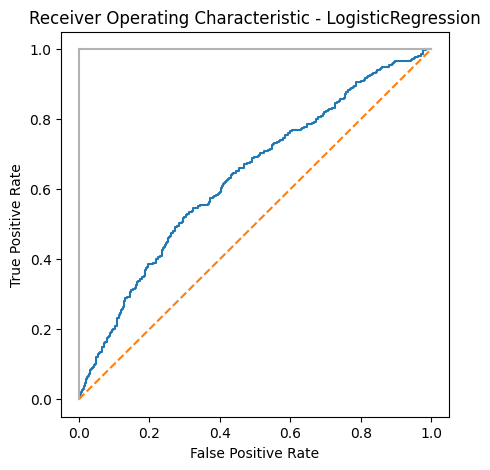

In [50]:
y_score1 = log_reg.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

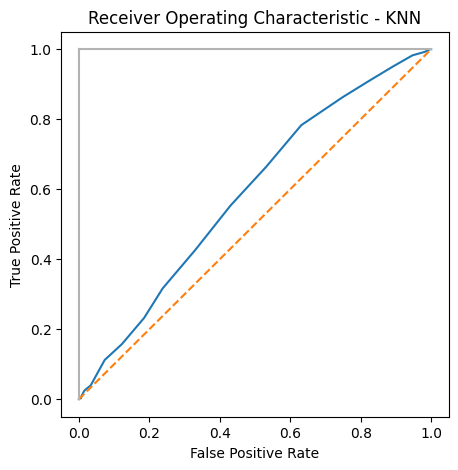

In [48]:
y_score1 = pipeline.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

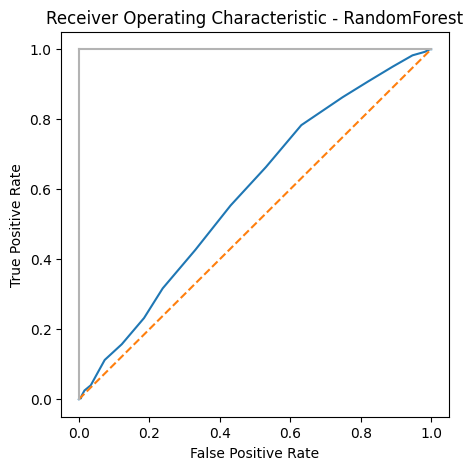

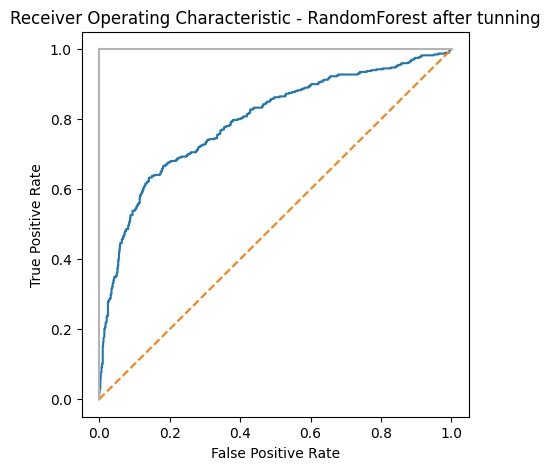

In [49]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RandomForest after tunning')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Processing time of RandomForest Classifier in our case took over 3 hours so that we will implement only final GridSearchCV results and outcomes  like precision and  recall scores.

In [ ]:
bank_marketing_train['y'].value_counts() #For Question 2.2 C.3

no     8903
yes    3967
Name: y, dtype: int64

RandomForestClassifier: amount of trees, you cant visualize the output.  DecisionTreeClassifier: output is a tree which can be visualized 

### 2.2.C.1

The output of RandomForestClassifier is impossible (or the very least almost) to interpretate since it generates a large amount of trees (a forest). This is different from the DecisionTreeClassifier which creates a single easy to interpretate decision tree. 

### 2.2.C.2

RandomForest is more accurate and precise than DecisionTree. RandomForest prevents overfitting because it generates a lot of trees. However, it also comes at a cost: it is more computation heavy and is therefore costly to do it for large datasets. Therefore we have to consider overfitting, computation power / dataset size, interpretability/visualization.  An example from our data: we might want to prefer DecisionTree if we want to generate a tree for the employees so they can already predict whether it is smart to approach someone (marketing) based on the data. This is not possible with RandomForest.

Note: 50 words is just too little to give a reasonable explanation since there is such a large difference between the models. 

### 2.2.C.3

Accuracy is not an appropriate evaluation metric for this classification task since the dataset is noticeably unbalanced. A confusion matrix would be more appropriate since the training set target variable has a lot more no's.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2005e61-7df3-4d3e-9803-0c4860cd8f2e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>